<h1> Imports </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<h1> Build synthetic dataset that matches param_a logarithmic pattern</h1>

In [2]:
# Dataset parameters
# np.random.seed(42)
num_samples = 100
param_a = 2
param_b = 0
x_min = 0.1
x_max = 20
random_scale = 0.5 # The higher this parameter, the higher the variability, the worse a linear regression model will predict (R-squared will decrease)

# Build dataset (X, y)
# X = np.linspace(x_min, x_max, num_samples)
X = np.logspace(np.log10(x_min), np.log10(x_max), num_samples) # This generates more density in smaller Xs (where the function change is faster (derivative is larger in that range))
y = np.log(X) * param_a + param_b + np.random.normal(scale=random_scale, size=num_samples)
df = pd.DataFrame({'X': X, 'y': y})

<h1> Dataset analysis and exploration </h1>

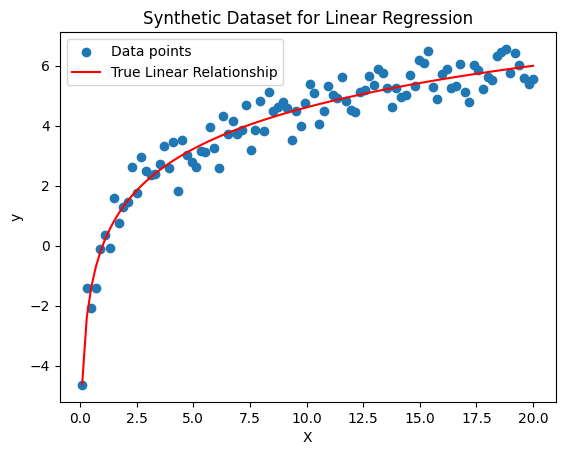

In [3]:
# Visualize the dataset
plt.scatter(X, y, label='Data points')
plt.plot(X, param_a * np.log(X) + param_b, color='red', label='True Linear Relationship')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Synthetic Dataset for Linear Regression')
plt.show()

<h1> Model prediction: simple linear regression </h1>

In [4]:
# Get features (X) and target (y) variables
X = df[['X']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Initialize the Linear Regression model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# model = SVR(kernel='sigmoid', C=1.0, epsilon=0.1)
# model = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Mean Squared Error: 0.33752344880842816
R-squared: 0.8965670493231163


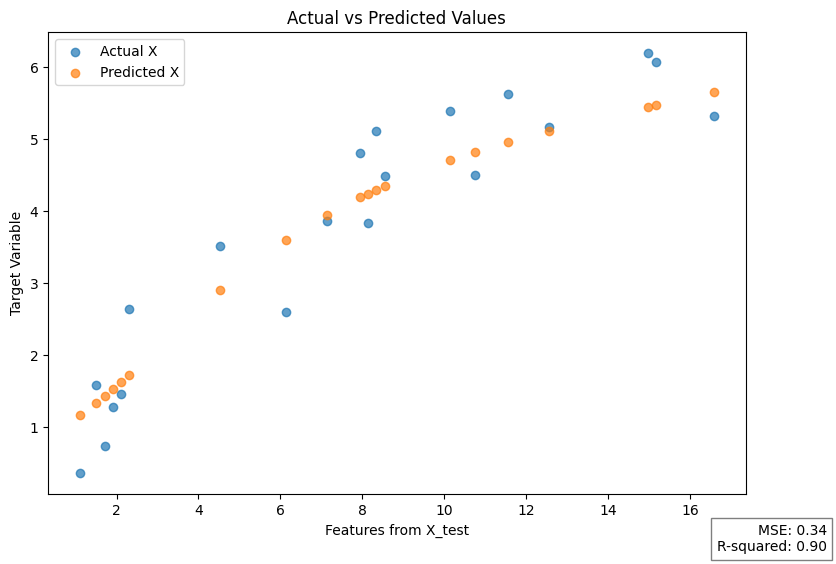

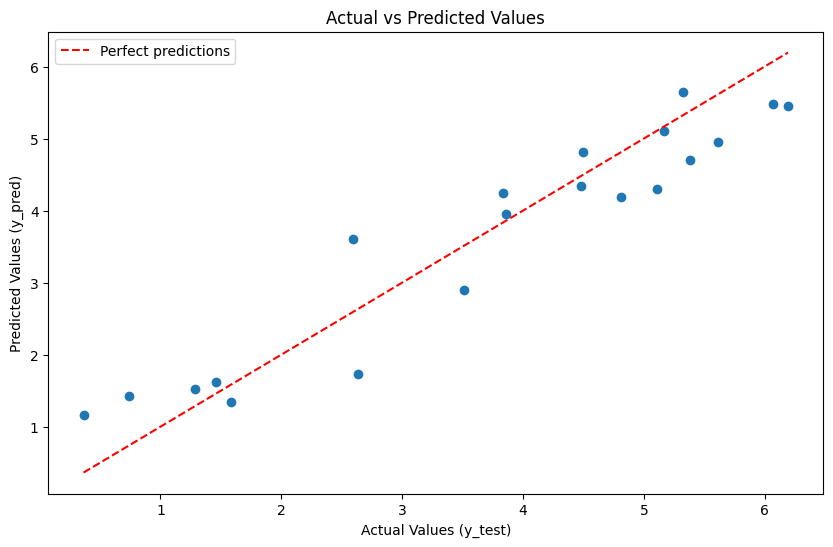

In [6]:
# Model evaluation

# MSE
# - possible values: >= 0
# - the smaller the better
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R-squared: 
# - possible values: [0, 1] interval
# - the higher (closer to 1) the better
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

# Plot y_test (actual values) and y_predicted vs X_test
num_features = X_test.shape[1]
plt.figure(figsize=(9, 6))
for i in range(num_features):
    plt.scatter(X_test.iloc[:, i], y_test, label=f'Actual {X_test.columns[i]}', alpha=0.7)
    plt.scatter(X_test.iloc[:, i], y_pred, label=f'Predicted {X_test.columns[i]}', alpha=0.7)
plt.xlabel('Features from X_test')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values')
textstr = f'MSE: {mse:.2f}\nR-squared: {r_squared:.2f}'
plt.gcf().text(0.99, 0.01, textstr, fontsize=10, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.show()

# Plot y_test (actual values) vs y_predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect predictions')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

